In [1]:
#selenium 가져오기
from selenium import webdriver

### 화면 진입 후 100개씩 조회

In [7]:
#크롬 드라이버 가져오기. 없으면 다운 받아야한다
driver = webdriver.Chrome('chromedriver/chromedriver.exe')
#크롤링할 화면 주소
driver.get("https://www.ntis.go.kr/rndgate/eg/un/ra/mng.do") 

In [8]:
#한번에 표시할 게시글 수 지정
#리스트 접근
element = driver.find_element_by_xpath("""//*[@id="rndListArea"]/div[1]/div[2]/div/select""")
#리스트 값 선택
element.send_keys(100)

In [9]:
#조회버튼 클릭
check_class = "sm_button"
check = driver.find_element_by_class_name(check_class).click()

# 테스트----------------
:: 1부터 10번행까지만 가져온다
### 정보 가져오기

In [5]:
#기관과 과제 정보 가져오기
rd_list = [] #리스트 저장장소
rd_one = [] #기관,과제 한세트

for i in range(1,11): #1행부터 10행까지
    #기관정보
    ints_xpath="""//*[@id="rndListArea"]/table/tbody/tr[""" + str(i) + """]/td[4]"""
    ints = driver.find_element_by_xpath(ints_xpath).text
    #과제 정보
    assignment_xpath="""//*[@id="rndListArea"]/table/tbody/tr[""" + str(i) + """]/td[5]/div/a"""
    assignment = driver.find_element_by_xpath(assignment_xpath).text
    rd_one = [ints, assignment]
    rd_list.append(rd_one)

In [6]:
rd_list

[['산업통상자원부', '2023년도 3차 전력정보화 및 정책지원사업(신재생에너지 분야) 신규지원 대상과제 공고'],
 ['보건복지부', '2023년도 제2차 보건의료기술 연구개발사업 신규지원 대상과제 통합 재공고(2차)'],
 ['과학기술정보통신부', '2023년 제27회 젊은과학자상 선정 계획 공고'],
 ['보건복지부', '2023년 제3차 융합형 의사과학자 양성 사업 공고(전일제 박사학위과정 지원)'],
 ['고용노동부', '고용노동부 2023년 정규 제4차 정책연구과제 입찰공고(8건)'],
 ['보건복지부', '화장품산업 현황분석 및 지원정책 연구'],
 ['고용노동부', '디지털 감사 체계 강화를 위한 공단 e-감사시스템 개선방안 연구'],
 ['공정거래위원회', '온라인 플랫폼 분야심사지침에 따른 경제분석 기법 연구_재공고'],
 ['행정안전부', '지방의정연수 맞춤형 교육콘텐츠 개발 연구'],
 ['과학기술정보통신부', '지능정보기술 정보시스템 감리교육교재 개발']]

### df로 만들어 엑셀로 넘기기

In [53]:
import pandas as pd
NTIS_test=pd.DataFrame(rd_list, columns=['기관','과제명'])
NTIS_test.to_excel('NTIS test.xlsx')
#inventors.to_excel('inventors.xlsx')

### 페이지 넘기기

In [69]:
next_path = """//*[@id="rndListArea"]/div[3]/div/a[3]""" #2페이지 접근
driver.find_element_by_xpath(next_path).click()

In [ ]:
//*[@id="rndListArea"]/div[3]/div/a[5]
//*[@id="rndListArea"]/div[3]/div/a[13]#다음 접근
//*[@id="rndListArea"]/div[3]/div/a[3] # 11페이지 접근
//*[@id="rndListArea"]/div[3]/div/a[4] # 12페이지 접근

# 테스트 끝---------------

### 최종코드

In [10]:
import time
rd_list = []
rd_one = []

#기관과 과제 정보를 가져온다
for i in range(4,14): #페이지 선택
    for j in range(1,101): #1행부터 100행까지 선택
        #기관정보
        ints_xpath="""//*[@id="rndListArea"]/table/tbody/tr[""" + str(j) + """]/td[4]"""
        ints = driver.find_element_by_xpath(ints_xpath).text
        #과제 정보
        assignment_xpath="""//*[@id="rndListArea"]/table/tbody/tr[""" + str(j) + """]/td[5]/div/a"""
        assignment = driver.find_element_by_xpath(assignment_xpath).text
        #기관과 과제 배열
        rd_one = [ints, assignment]
        #리스트에 배열을 추가한다
        rd_list.append(rd_one)
    #다음페이지
    next_path = """//*[@id="rndListArea"]/div[3]/div/a["""+str(i)+"""]"""
    driver.find_element_by_xpath(next_path).click()
    time.sleep(2)
    

In [14]:
import pandas as pd
test2 = pd.DataFrame(rd_list,columns=['기관','과제'])
test2

,기관,과제
0,산업통상자원부,2023년도 3차 전력정보화 및 정책지원사업(신재생에너지 분야) 신규지원 대상과제 공고
1,보건복지부,2023년도 제2차 보건의료기술 연구개발사업 신규지원 대상과제 통합 재공고(2차)
2,과학기술정보통신부,2023년 제27회 젊은과학자상 선정 계획 공고
3,보건복지부,2023년 제3차 융합형 의사과학자 양성 사업 공고(전일제 박사학위과정 지원)
4,고용노동부,고용노동부 2023년 정규 제4차 정책연구과제 입찰공고(8건)
...,...,...
995,방위사업청,Heli-borne MUMT 개발 기술(무기체계 패키지형)_재공고
996,방위사업청,함정 적외선감쇠장치(IRSS) 설계기술 개발(응용연구)_재공고
997,방위사업청,잠수함용 전자광학 탑재체 기술(무기체계 패키지형)_재공고
998,방위사업청,휴머노이드용 장수명 전원기술(무기체계 패키지형)_재공고


In [16]:
test2.to_excel('NTIS test2.xlsx')

### 엑셀 데이터 이용

In [18]:
#데이터 불러오기
assn = pd.read_excel("NTIS test2.xlsx")

In [19]:
#데이터 미리보기
assn

,Unnamed: 0,기관,과제
0,0,산업통상자원부,2023년도 3차 전력정보화 및 정책지원사업(신재생에너지 분야) 신규지원 대상과제 공고
1,1,보건복지부,2023년도 제2차 보건의료기술 연구개발사업 신규지원 대상과제 통합 재공고(2차)
2,2,과학기술정보통신부,2023년 제27회 젊은과학자상 선정 계획 공고
3,3,보건복지부,2023년 제3차 융합형 의사과학자 양성 사업 공고(전일제 박사학위과정 지원)
4,4,고용노동부,고용노동부 2023년 정규 제4차 정책연구과제 입찰공고(8건)
...,...,...,...
995,995,방위사업청,Heli-borne MUMT 개발 기술(무기체계 패키지형)_재공고
996,996,방위사업청,함정 적외선감쇠장치(IRSS) 설계기술 개발(응용연구)_재공고
997,997,방위사업청,잠수함용 전자광학 탑재체 기술(무기체계 패키지형)_재공고
998,998,방위사업청,휴머노이드용 장수명 전원기술(무기체계 패키지형)_재공고


In [21]:
#필요한 행만 추출
ass_data=assn[['기관','과제']]

In [22]:
#결측치 제거
ass_data.dropna()

,기관,과제
0,산업통상자원부,2023년도 3차 전력정보화 및 정책지원사업(신재생에너지 분야) 신규지원 대상과제 공고
1,보건복지부,2023년도 제2차 보건의료기술 연구개발사업 신규지원 대상과제 통합 재공고(2차)
2,과학기술정보통신부,2023년 제27회 젊은과학자상 선정 계획 공고
3,보건복지부,2023년 제3차 융합형 의사과학자 양성 사업 공고(전일제 박사학위과정 지원)
4,고용노동부,고용노동부 2023년 정규 제4차 정책연구과제 입찰공고(8건)
...,...,...
995,방위사업청,Heli-borne MUMT 개발 기술(무기체계 패키지형)_재공고
996,방위사업청,함정 적외선감쇠장치(IRSS) 설계기술 개발(응용연구)_재공고
997,방위사업청,잠수함용 전자광학 탑재체 기술(무기체계 패키지형)_재공고
998,방위사업청,휴머노이드용 장수명 전원기술(무기체계 패키지형)_재공고


In [24]:
#기관 속성별로 개수 보기
ass_data['기관'].value_counts()

과학기술정보통신부    173
산업통상자원부       87
기타            76
보건복지부         64
국토교통부         57
문화체육관광부       54
농림축산식품부       49
방위사업청         44
환경부           42
중소벤처기업부       38
질병관리청         31
해양수산부         28
행정안전부         23
교육부           23
식품의약품안전처      19
경찰청           17
외교부           16
특허청           16
고용노동부         14
법무부           13
통일부           12
국방부           12
농촌진흥청         11
산림청           10
해양경찰청          9
문화재청           8
기상청            7
원자력안전위원회       5
국무조정실          5
공정거래위원회        4
통계청            4
국가보훈처          4
여성가족부          3
기획재정부          3
개인정보보호위원회      1
국회             1
Name: 기관, dtype: int64

## 워드클라우드 생성

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

## 과제 데이터 텍스트화

In [102]:
#과제데이터를 txt파일로 저장. 인덱스와 헤더 X
ass_data['과제'].to_csv('텍스트 저장.txt',index=False, header=None, encoding='utf-8')

In [110]:
f = open('텍스트 저장.txt', 'r', encoding='utf-8')

In [111]:
assignment_list = f.readlines()

In [112]:
assignment_txt=""
for s in assignment_list:
    assignment_txt += s + " "

In [113]:
assignment_txt

'2023년도 3차 전력정보화 및 정책지원사업(신재생에너지 분야) 신규지원 대상과제 공고\n 2023년도 제2차 보건의료기술 연구개발사업 신규지원 대상과제 통합 재공고(2차)\n 2023년 제27회 젊은과학자상 선정 계획 공고\n 2023년 제3차 융합형 의사과학자 양성 사업 공고(전일제 박사학위과정 지원)\n 고용노동부 2023년 정규 제4차 정책연구과제 입찰공고(8건)\n 화장품산업 현황분석 및 지원정책 연구\n 디지털 감사 체계 강화를 위한 공단 e-감사시스템 개선방안 연구\n 온라인 플랫폼 분야심사지침에 따른 경제분석 기법 연구_재공고\n 지방의정연수 맞춤형 교육콘텐츠 개발 연구\n 지능정보기술 정보시스템 감리교육교재 개발\n 신선농산물 대상 기능성 표시에 관한 인식도 조사 연구\n 자활사업 성과향상을 위한 정신건강 증진 프로그램 개발 연구\n 5G 특화망 테스트베드 이용 활성화 방안 연구\n 공공미술사업 업무 매뉴얼 고도화 제작 및 공공미술 공론화 포럼 연구_재공고\n 2023년 작은미술관 조성 및 운영지원 사업 평가 연구_재공고\n 2023년 메타버스 예술활동 지원사업 현황조사 및 개선방안 연구_재공고\n 북한 핵 위기 시 국민보호대책 연구\n 과학기술 기반 한국형 ODA 모델 발굴 및 추진방안 수립 연구\n 과기정통부 소관 데이터 활용 활성화를 위한 분석과제 추진방안 컨설팅 연구\n 2023년 규제비용관리제에 따른 신설·강화 규제 및 상쇄과제 비용분석 연구\n 대학 혁신을 위한 대학 특성화 및 통합모델 기반 특성화 방안 연구\n 공공부문 수어 소통 개선 방안 연구\n 지역 과학기술혁신 수준 진단모형의 개발 및 적용 연구\n 해양경찰 종합상황실 마스터 플랜 수립 연구용역\n 2023년도 보건위기 대응 신속 비임상시험 실증개발 신규지원 대상과제 공고\n 2023년 제3차 과학기술분야 연구기획과제 주관연구책임자 공모\n 이노폴리스 대중소 오픈이노베이션 챌린지2\n 2023년도 제3차 과학기술분야 연구기획과제 공모_(2023)2023년도 제3차 과학기술분

In [114]:
okt = Okt()
nouns = okt.nouns(assignment_txt) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [115]:
c

Counter({'전력': 5,
         '정보화': 5,
         '정책': 85,
         '지원': 139,
         '사업': 263,
         '신재생에너지': 6,
         '분야': 53,
         '신규': 107,
         '대상': 53,
         '과제': 167,
         '공고': 297,
         '보건': 11,
         '의료': 7,
         '기술': 143,
         '연구개발': 29,
         '통합': 35,
         '과학자': 1,
         '선정': 13,
         '계획': 45,
         '융합': 25,
         '의사과학': 1,
         '양성': 4,
         '일제': 1,
         '박사학위': 1,
         '과정': 9,
         '고용노동부': 1,
         '정규': 1,
         '연구': 779,
         '입찰': 26,
         '화장품': 3,
         '산업': 56,
         '현황': 15,
         '분석': 90,
         '디지털': 18,
         '감사': 5,
         '체계': 91,
         '강화': 31,
         '공단': 2,
         '시스템': 25,
         '개선': 105,
         '방안': 225,
         '온라인': 5,
         '플랫폼': 19,
         '심사': 4,
         '지침': 8,
         '경제': 6,
         '기법': 6,
         '지방': 5,
         '정연수': 1,
         '맞춤': 11,
         '교육': 32,
         '콘텐츠': 5,
    

In [122]:
del c['사업']
del c['연구']
del c['공고']
del c['용역']

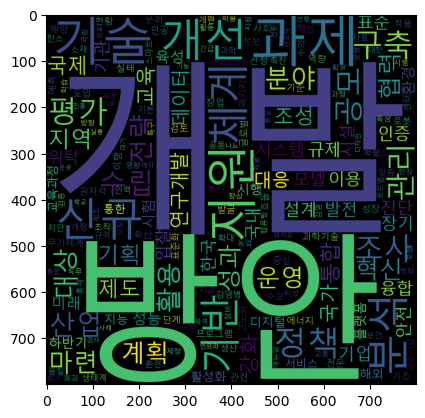

In [123]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [124]:
del c['개발']
del c['방안']
del c['기술']
del c['신규']

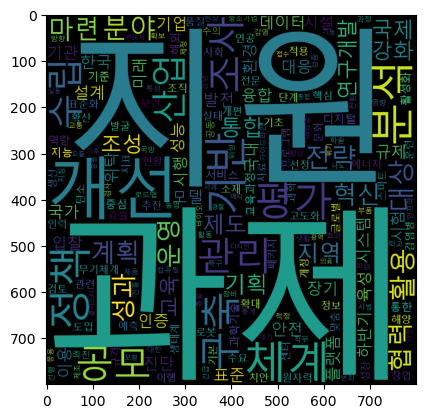

In [125]:
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)